In [1]:
import faker
import pandas as pd
from datetime import date, datetime, timedelta
import random
import numpy as np
import seaborn as sns

In [2]:
fake = faker.Faker('pl_PL')

In [4]:
n = 600
start_date = date(2021,1,4)
end_date = date(2023,6,15)
days_number = (end_date - start_date).days

def get_dates_between():
    return [start_date + timedelta(days = i) for i in range(days_number)]



def prawdopodobienstwa_rejestracja():
    n = days_number
    series = []

    for i in range(n - 1):
        xi = random.uniform(0, 1)
        series.append(xi)

    series.sort(reverse=True)  # Sortowanie malejące
    scaling_factor = 1 / sum(series)
    series = [x * scaling_factor for x in series]

    remaining_sum = abs(1 - sum(series))  # tu teoretycznie przekrocze 1 w wektorze prawd ale na dalekim miejscu po przecinku
    series.append(remaining_sum)

    return series

prawdopodobienstwa_rejestracja()

[0.002243297683319633,
 0.0022430054544864673,
 0.0022354908585191175,
 0.002230660524598883,
 0.0022272852665760293,
 0.002225253430856575,
 0.002223116104480311,
 0.002219819010407967,
 0.0022189273566141626,
 0.002218856927684364,
 0.00221835540334579,
 0.0022175194399743077,
 0.0022144847670454203,
 0.00220470441978137,
 0.0022024145265679474,
 0.0022009406843919448,
 0.0021989141437448513,
 0.002191725521902639,
 0.0021900549329151977,
 0.0021859213411020823,
 0.0021856401602757787,
 0.0021829097368844127,
 0.0021799736845671746,
 0.002178618436680481,
 0.0021781949477110638,
 0.0021778863671053765,
 0.0021720339591939164,
 0.0021707367901819133,
 0.0021705768965680715,
 0.002170088944692101,
 0.0021687083916732963,
 0.002167364940509422,
 0.0021672074645915688,
 0.002166303638465977,
 0.0021648862366654958,
 0.0021618034066333155,
 0.0021606910679573496,
 0.002160276817663244,
 0.00215984970252115,
 0.002159459595145561,
 0.0021583359979632354,
 0.002155330996194633,
 0.002153670

In [5]:
get_dates_between()

[datetime.date(2021, 1, 4),
 datetime.date(2021, 1, 5),
 datetime.date(2021, 1, 6),
 datetime.date(2021, 1, 7),
 datetime.date(2021, 1, 8),
 datetime.date(2021, 1, 9),
 datetime.date(2021, 1, 10),
 datetime.date(2021, 1, 11),
 datetime.date(2021, 1, 12),
 datetime.date(2021, 1, 13),
 datetime.date(2021, 1, 14),
 datetime.date(2021, 1, 15),
 datetime.date(2021, 1, 16),
 datetime.date(2021, 1, 17),
 datetime.date(2021, 1, 18),
 datetime.date(2021, 1, 19),
 datetime.date(2021, 1, 20),
 datetime.date(2021, 1, 21),
 datetime.date(2021, 1, 22),
 datetime.date(2021, 1, 23),
 datetime.date(2021, 1, 24),
 datetime.date(2021, 1, 25),
 datetime.date(2021, 1, 26),
 datetime.date(2021, 1, 27),
 datetime.date(2021, 1, 28),
 datetime.date(2021, 1, 29),
 datetime.date(2021, 1, 30),
 datetime.date(2021, 1, 31),
 datetime.date(2021, 2, 1),
 datetime.date(2021, 2, 2),
 datetime.date(2021, 2, 3),
 datetime.date(2021, 2, 4),
 datetime.date(2021, 2, 5),
 datetime.date(2021, 2, 6),
 datetime.date(2021, 2, 7)

In [6]:
country_probabilities = [0.78, 0.08, 0.04, 0.1]
email_endings_pl = ["@gmail.com", "@wp.pl", "@o2.pl", "@live.com"]
email_endings_de = ["@gmail.com", "@web.de", "@gmx.net", "@live.com"]
email_endings_cs = ["@gmail.com", "@szn.cz", "live.com"]
email_endings_uk = ["@gmail.com", "@mail.ru", "@live.com"]


def generate_customer():
    countries = ["Poland", "Germany", "Czech Republic", "Ukraine"]
    country = random.choices(countries, weights=country_probabilities)[0]
    
    if country == "Poland":
        fake = faker.Faker('pl_PL')
        if random.random() < 0.5:
            x = fake.first_name_female()
            y = fake.last_name_female()
            email = generate_email(x, y) + random.choice(email_endings_pl)
            return x, y, email
        else:
            x = fake.first_name_male()
            y = fake.last_name_male()
            email = generate_email(x, y) + random.choice(email_endings_pl)
            return x, y, email
        
    elif country == "Germany":
        fake = faker.Faker('de_DE')
        if random.random() < 0.5:
            x = fake.first_name_female()
            y = fake.last_name_female()
            email = generate_email(x, y) + random.choice(email_endings_de)
            return x, y, email
        else:
            x = fake.first_name_male()
            y = fake.last_name_male()
            email = generate_email(x, y) + random.choice(email_endings_de)
            return x, y, email
        
    elif country == "Czech Republic":
        fake = faker.Faker('cs_CZ')
        if  random.random() < 0.5:
            x = fake.first_name_female()
            y = fake.last_name_female()
            email = generate_email(x, y) + random.choice(email_endings_cs)
            return x, y, email
        else:
            x = fake.first_name_male()
            y = fake.last_name_male()
            email = generate_email(x, y) + random.choice(email_endings_cs)
            return x, y, email
        
    elif country == "Ukraine":
        fake = faker.Faker('uk_UA')
        if  random.random() < 0.5:
            x = fake.first_name_female()
            y = fake.last_name_female()
            email = generate_email(x, y) + random.choice(email_endings_uk)
            return x, y, email
        else:
            x = fake.first_name_male()
            y = fake.last_name_male()
            email = generate_email(x, y) + random.choice(email_endings_uk)
            return x, y, email

        

def generate_email(first_name, last_name):
    if " " in first_name:
        first_name = first_name.split(" ")[0] 
    email = first_name[0 : random.randint(2, len(first_name)-1)] + last_name[0 : random.randint(2, len(last_name)-1)] 
    email += str(random.choices(['', random.randint(0,100)], weights=[0.4,0.6])[0])
    return email



In [7]:
generate_customer()

('Ewelina', 'Michnowicz', 'EwelMich1@gmail.com')

In [8]:
registration_dates = [start_date]*15 + [start_date + timedelta(days = 1)]*10 + [start_date + timedelta(days = 2)]*5 + [random.choices(get_dates_between(), weights=prawdopodobienstwa_rejestracja())[0] for _ in range(n-30)]
random.shuffle(registration_dates)


customers = {
    'customer_id': [_+1 for _ in range(n)],
    'first_name': ["s" for _ in range(n)],
    'last_name': ["a" for _ in range(n)],
    'birthdate': [fake.date_of_birth(minimum_age=13, maximum_age=80) for _ in range(n)],
    'points': [_ for _ in range(n)],
    'email': ["s" for _ in range(n)],
    'phone': [random.randint(100000000,999999999) for _ in range(n)],
    'address_id': [_ for _ in range(n)],
    'registration_date': registration_dates
}

df_customers = pd.DataFrame(customers)

for i in range(n):
    df_customers.at[i,"first_name"], df_customers.at[i,"last_name"], df_customers.at[i,"email"] = generate_customer()
    
df_customers["address_id"] = random.sample([i for i in range(n)], n)
    
df_customers

,customer_id,first_name,last_name,birthdate,VIP,points,email,phone,address_id,registration_date
0,1,Gaja,Miętus,1949-10-14,0,0,GajMiętu@wp.pl,823252463,582,2021-08-06
1,2,Roksana,Mysiak,2000-06-12,1,1,RokMys19@live.com,866911072,526,2021-08-25
2,3,Kajetan,Piskor,1959-06-09,2,2,KajetPisko@gmail.com,176989589,119,2021-01-05
3,4,Анастасія,Шинкаренко,1959-10-14,3,3,АнШинк@mail.ru,519190857,206,2021-02-13
4,5,Леон,Редько,1954-08-26,4,4,ЛеоРед@mail.ru,721184993,495,2021-06-05
...,...,...,...,...,...,...,...,...,...,...
595,596,Alan,Lewko,1968-10-29,595,595,AlLew49@gmail.com,720203409,576,2021-05-06
596,597,Janina,Karczmarz,2008-07-16,596,596,JaninKa65@o2.pl,580996992,6,2022-01-12
597,598,Tomasz,Lizoń,2004-09-29,597,597,TomLi14@wp.pl,460792023,406,2021-05-17
598,599,Inga,Ciuk,2008-11-22,598,598,InCiu33@gmail.com,409832660,349,2021-01-05


In [9]:
df_rental = pd.read_csv('rental.csv')
df_rental

,Unnamed: 0,rental_id,inventory_id,rental_date,return_date,game_id,customer_id,staff_id
0,16184,1,390,2021-01-04,2021-01-12,13,242,1
1,8152,2,196,2021-01-04,2021-01-04,39,242,1
2,12329,3,298,2021-01-04,2021-01-13,35,242,1
3,1802,4,43,2021-01-04,2021-01-19,33,242,1
4,9642,5,233,2021-01-04,2021-01-09,5,242,1
...,...,...,...,...,...,...,...,...
20548,7466,20549,178,2023-06-15,NaN,22,226,1
20549,3851,20550,92,2023-06-15,NaN,1,486,4
20550,8483,20551,203,2023-06-15,NaN,22,526,3
20551,7506,20552,179,2023-06-15,2023-06-15,13,174,3


In [10]:
temp = {
    'customer_id': [i+1 for i in range(n)],
    'count': [0]*n,
    'date': [None]*n
}

df_temp = pd.DataFrame(temp)

df_temp
        

# client_id - 1 jak poprawimy zeby rentale mialy customer_id od 1 a nie od 0    
    
for i in range( len(df_rental) ):
    client_id = df_rental["customer_id"][i]
    
    df_temp.at[client_id - 1,"count"] = df_temp["count"][client_id- 1] + 1
    
    if df_temp["count"][client_id-1] == 10:
        df_temp.at[client_id-1,"date"] = df_rental["return_date"][i]

In [11]:
df_temp

,customer_id,count,date
0,1,41,2021-09-24
1,2,24,2021-12-22
2,3,27,2022-05-08
3,4,33,2021-11-30
4,5,34,2022-06-04
...,...,...,...
595,596,29,2022-06-26
596,597,39,2021-10-15
597,598,39,2021-11-27
598,599,61,2021-01-27


In [12]:
df_customers["VIP"] = df_temp["date"]
df_customers

,customer_id,first_name,last_name,birthdate,VIP,points,email,phone,address_id,registration_date
0,1,Gaja,Miętus,1949-10-14,2021-09-24,0,GajMiętu@wp.pl,823252463,582,2021-08-06
1,2,Roksana,Mysiak,2000-06-12,2021-12-22,1,RokMys19@live.com,866911072,526,2021-08-25
2,3,Kajetan,Piskor,1959-06-09,2022-05-08,2,KajetPisko@gmail.com,176989589,119,2021-01-05
3,4,Анастасія,Шинкаренко,1959-10-14,2021-11-30,3,АнШинк@mail.ru,519190857,206,2021-02-13
4,5,Леон,Редько,1954-08-26,2022-06-04,4,ЛеоРед@mail.ru,721184993,495,2021-06-05
...,...,...,...,...,...,...,...,...,...,...
595,596,Alan,Lewko,1968-10-29,2022-06-26,595,AlLew49@gmail.com,720203409,576,2021-05-06
596,597,Janina,Karczmarz,2008-07-16,2021-10-15,596,JaninKa65@o2.pl,580996992,6,2022-01-12
597,598,Tomasz,Lizoń,2004-09-29,2021-11-27,597,TomLi14@wp.pl,460792023,406,2021-05-17
598,599,Inga,Ciuk,2008-11-22,2021-01-27,598,InCiu33@gmail.com,409832660,349,2021-01-05


In [13]:
df_customers.to_csv("customers.csv", index=False)

In [14]:
df_customers.sort_values(by="registration_date").head(n=15)

,customer_id,first_name,last_name,birthdate,VIP,points,email,phone,address_id,registration_date
61,62,Ярослава,Саєнко,1984-05-01,2021-02-23,61,ЯрослСа@live.com,756322283,575,2021-01-04
266,267,Szymon,Księżyk,1944-06-03,2021-08-10,266,SzyKsię25@wp.pl,898183324,299,2021-01-04
288,289,Василина,Ляшко,2007-03-15,2021-09-16,288,ВасилинЛяшк@mail.ru,442348729,134,2021-01-04
429,430,Krzysztof,Blank,2005-07-03,2021-05-16,429,KrzysztoBl36@live.com,411613325,329,2021-01-04
113,114,Beatrix,Bender,1968-03-29,2021-08-31,113,BeatrBen62@gmx.net,874194556,328,2021-01-04
502,503,Łukasz,Heczko,1997-12-09,2021-08-30,502,ŁuHecz@live.com,545036871,482,2021-01-04
304,305,Wiktor,Pasztaleniec,1953-10-20,2023-02-16,304,WiktoPas@gmail.com,167758565,94,2021-01-04
40,41,Орхип,Зубко,1998-06-25,2023-01-27,40,ОрЗуб@live.com,620350028,174,2021-01-04
472,473,Святослава,Козаченко,1988-11-25,2021-07-03,472,СвяКозаченк@live.com,820421713,373,2021-01-04
242,243,Priska,Dörschner,2007-01-21,None,242,PriskDörschne82@gmail.com,651816125,136,2021-01-04


<AxesSubplot:xlabel='registration_date', ylabel='Count'>

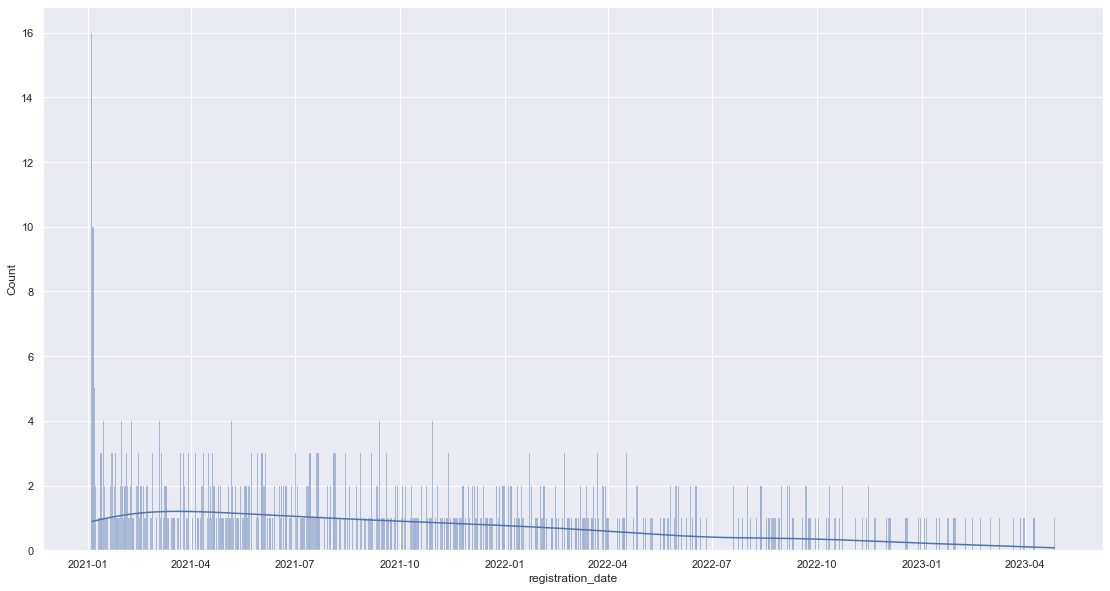

In [15]:
sns.set(rc={"figure.figsize": (19,10)})
sns.histplot(df_customers.sort_values(by="registration_date")["registration_date"], kde=True)